In [11]:
# !pip install eli5 lime dalex neattext pandas spacy numpy seaborn scikit-learn

  Using cached eli5-0.16.0-py2.py3-none-any.whl (108 kB)
  Using cached lime-0.2.0.1-py3-none-any.whl
  Using cached dalex-1.7.2-py3-none-any.whl
  Using cached neattext-0.1.3-py3-none-any.whl (114 kB)
  Using cached spacy-3.8.7-cp39-cp39-win_amd64.whl (14.9 MB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\wayne\anaconda3\python.exe' 'C:\Users\wayne\anaconda3\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\wayne\AppData\Local\Temp\tmpnddyaenw'
       cwd: C:\Users\wayne\AppData\Local\Temp\pip-install-ajk5kbfc\blis_a3d4cfcf21864ae1a644394831152d95
  Complete output (32 lines):
  BLIS_COMPILER? None
  C:\Users\wayne\AppData\Local\Temp\pip-build-env-pvcbbhlw\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: BSD License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          **************************************************

  Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
  Using cached graphviz-0.21-py3-none-any.whl (47 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
  Using cached pandas-2.3.1-cp39-cp39-win_amd64.whl (11.4 MB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
  Using cached srsly-2.5.1-cp39-cp39-win_amd64.whl (633 kB)
  Using cached preshed-3.0.10-cp39-cp39-win_amd64.whl (118 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl (27 kB)
  Using cached typer-0.16.0-py3-none-any.whl (46 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl (22 kB)
  Using cached cymem-2.0.11-cp39-cp39-win_amd64.whl (39 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl (444 kB)
  Using cached murmurhash-1.0.13-cp39-cp39-win_amd64.whl (24 kB)
  U

  copying blis\__init__.pxd -> build\lib.win-amd64-cpython-39\blis
  running build_ext
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel for blis
ERROR: Could not build wheels for blis which use PEP 517 and cannot be installed directly


# End2End-NLP-Project
+ Emotion Detection in Text
+ Text Classifier

In [6]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [7]:
# Load Data Viz Pkgs
import seaborn as sns

In [15]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [12]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [19]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [20]:
#Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

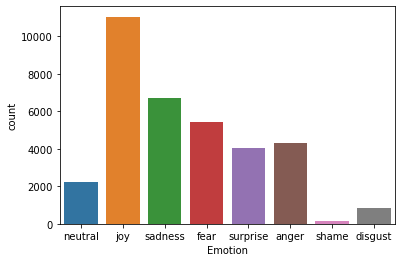

In [21]:
# Plot
sns.countplot(x='Emotion',data=df)

In [22]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [24]:
# Remove User Handles
df['Clean_text'] = df['Text'].apply(nfx.remove_userhandles)

In [25]:
# Remove Stopwords
df['Clean_text'] = df['Text'].apply(nfx.remove_stopwords)

In [28]:
# Remove Special Characters
#df['Clean_text'] = df['Text'].apply(nfx.remove_special_characters)

In [29]:
df

,Emotion,Text,Clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe.. hugggzzz u .! babe n...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,@MichelGW gift! Hope like it! hand wear ! It'l...
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [31]:
# Features and Labels
Xfeatures = df['Clean_text']
Ylabels = df['Emotion']

In [32]:
# Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,Ylabels,test_size=0.3,random_state=42)

In [33]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [36]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [38]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\wayne\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [39]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [40]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6224372485150412

In [41]:
# Make a Prediction
ex1 = "This book was so interesting that it made me happy"

In [42]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [43]:
# Prediction Probability
pipe_lr.predict_proba([ex1])

array([[1.81676076e-03, 6.21817638e-03, 5.05030180e-03, 9.49696153e-01,
        4.97213405e-05, 2.75930408e-02, 4.59302278e-05, 9.52991554e-03]])

In [44]:
# Know the Classes that match up with the prediction probabilities
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [47]:
# Save the Model and Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr.pkl", "wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()